In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
from cmocean import cm
import h5py

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)
#print(cluster.job_script())
w = cluster.start_workers(5)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

<Client: scheduler='tcp://10.148.0.120:51878' processes=10 cores=40>

---


# 1. Drifter data files

In [5]:
data_dir = '/home1/datawork/xyu/100_2Dh/float_trajectories_netcdf/'
filenames = sorted(glob(data_dir+'float_trajectories*.nc'))
%time ds = xr.open_mfdataset(filenames, concat_dim='time', compat='equals')
ds = ds.assign_coords(time=ds.time / 86400.)
print(ds)

CPU times: user 1.98 s, sys: 600 ms, total: 2.58 s
Wall time: 23.7 s
<xarray.Dataset>
Dimensions:  (time: 146, x0: 4450, y0: 2900)
Coordinates:
  * y0       (y0) float32 -55.995 -55.985 -55.975 -55.965 -55.955 -55.945 ...
  * x0       (x0) float32 -15.495 -15.485 -15.475 -15.465 -15.455 -15.445 ...
  * time     (time) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
Data variables:
    x        (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    y        (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    z        (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    u        (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    v        (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    vort     (time, y0, x0) float32 dask.array<shape=(146, 2900, 4450), chunksize=(1, 2900, 4450)>
    lavd  

## 2D maps

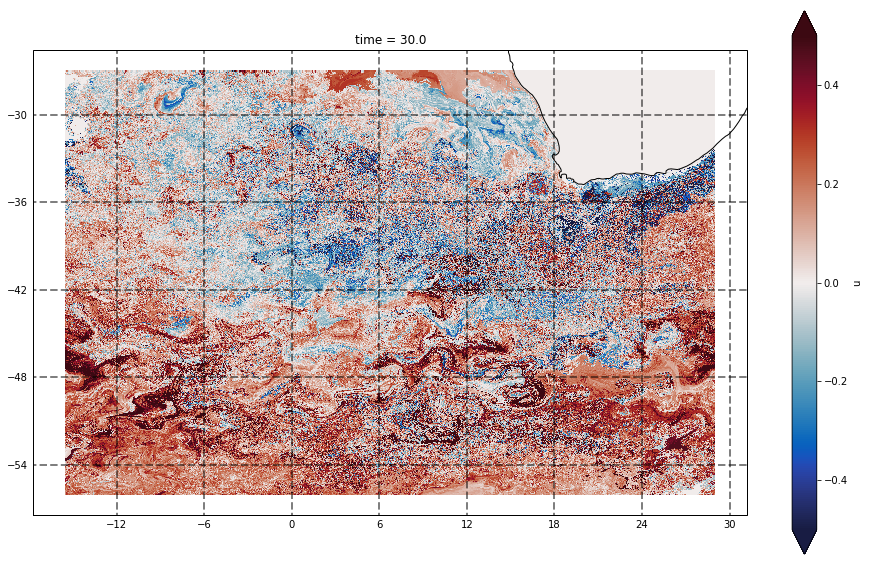

In [7]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds['u'].isel(time=60).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

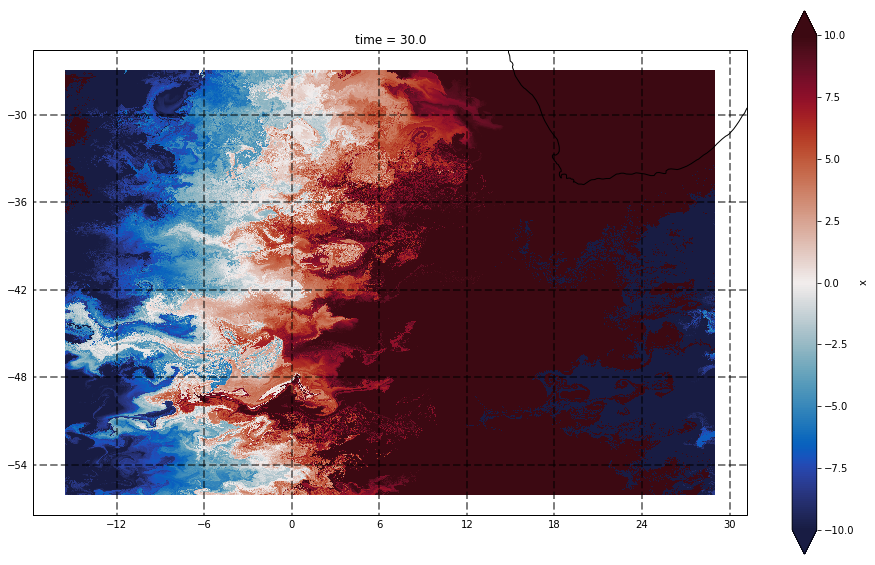

In [43]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

(ds['x']).isel(time=60).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

## time series

CPU times: user 952 ms, sys: 60 ms, total: 1.01 s
Wall time: 10.6 s


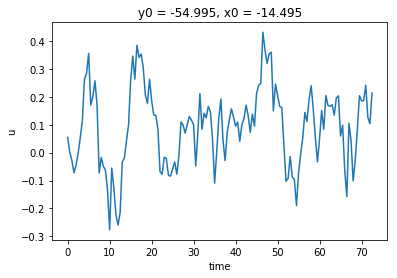

In [8]:
%time ds['u'].isel(x0=100,y0=100).plot()

CPU times: user 664 ms, sys: 28 ms, total: 692 ms
Wall time: 919 ms


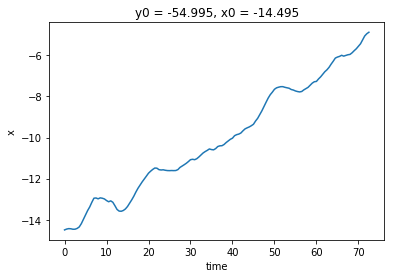

In [41]:
%time ds['x'].isel(x0=100,y0=100).plot()

_______
## Codes from Sinha

In [9]:
indir = '/home1/datawork/xyu/100_2Dh/float_trajectories_netcdf/'

%time ds = xr.open_mfdataset(indir+'*.nc')
ds = ds.assign_coords(time=ds.time / 86400.)

ds_all = ds.isel(time=slice(0,132))
print(ds_all)


CPU times: user 1.45 s, sys: 516 ms, total: 1.96 s
Wall time: 8.09 s
<xarray.Dataset>
Dimensions:  (time: 132, x0: 4450, y0: 2900)
Coordinates:
  * y0       (y0) float32 -55.995 -55.985 -55.975 -55.965 -55.955 -55.945 ...
  * x0       (x0) float32 -15.495 -15.485 -15.475 -15.465 -15.455 -15.445 ...
  * time     (time) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
Data variables:
    x        (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    y        (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    z        (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    u        (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    v        (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    vort     (time, y0, x0) float32 dask.array<shape=(132, 2900, 4450), chunksize=(1, 2900, 4450)>
    lavd  

In [10]:
# to have the same length of time series for all experiments
%time ds_diff = ds_all.diff('time') 
thresh = 10 # some large number of degrees, greater than any particle could

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 117 ms


In [11]:
# reasonably travel from one snapshot to the next
%time mask = ((abs( ds_diff.y )>thresh) | (abs(ds_diff.x) > thresh)).sum(dim='time').load()

CPU times: user 4.23 s, sys: 508 ms, total: 4.74 s
Wall time: 17.3 s


In [12]:
# to get rid of particles that reach the edge apply first mask
ds_masked1 = ds_all.where(mask==0)

# to get rid of land points apply second mask
ds_masked2 = ds_masked1.where(ds_masked1.vort!=0) 

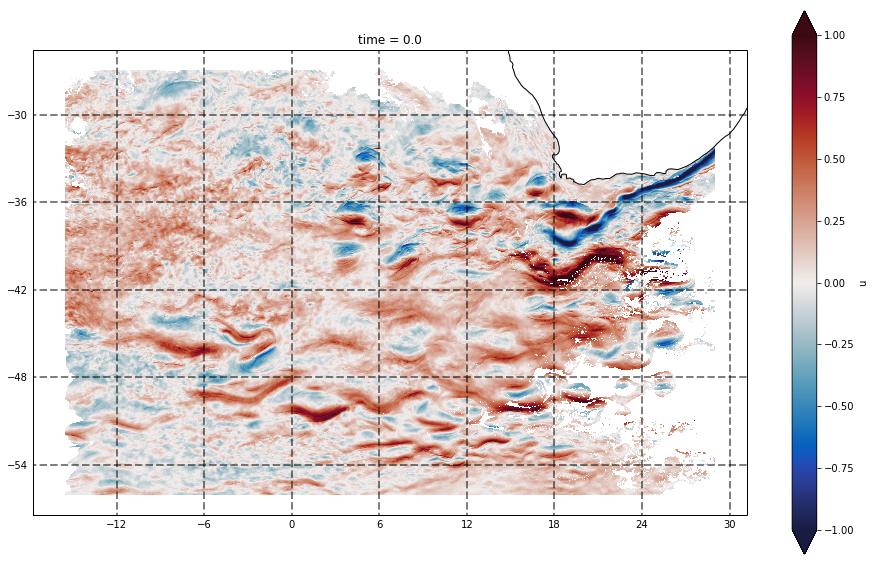

In [13]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=0).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

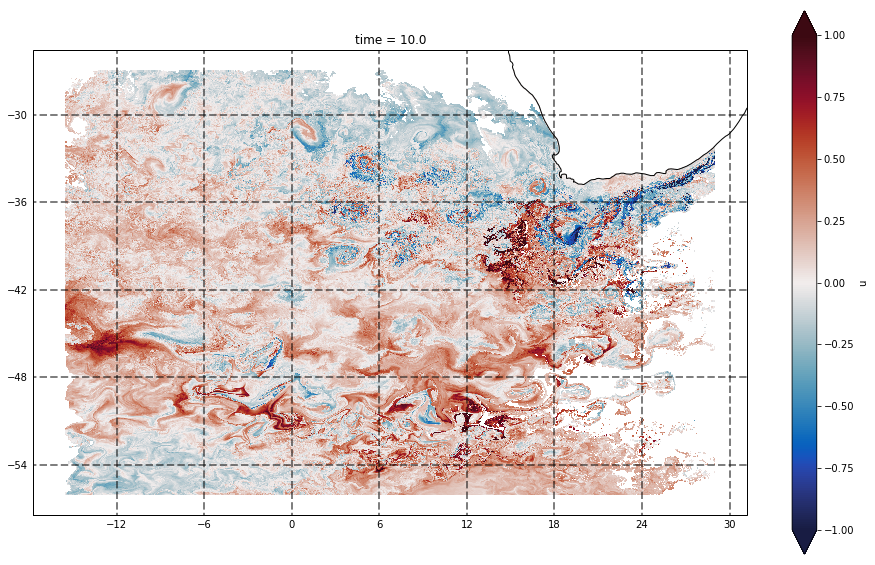

In [14]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=20).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

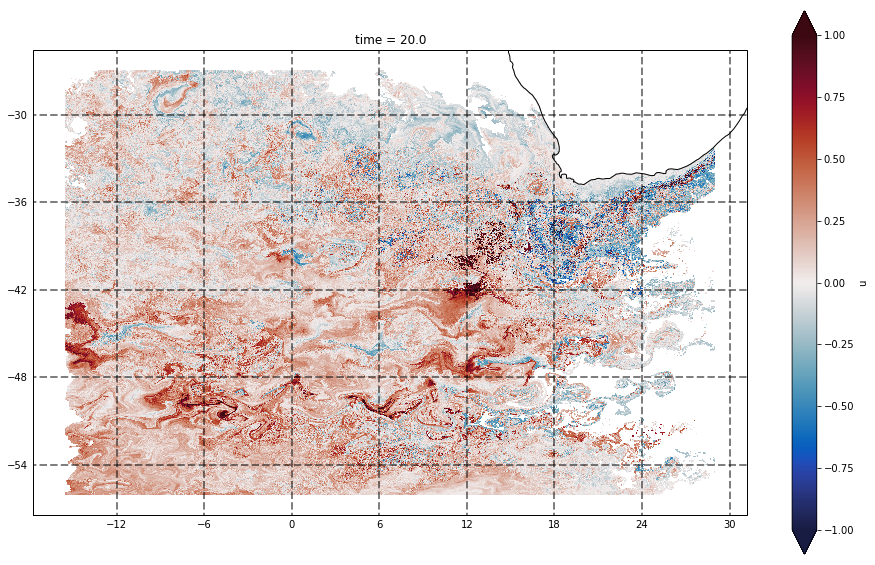

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=40).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

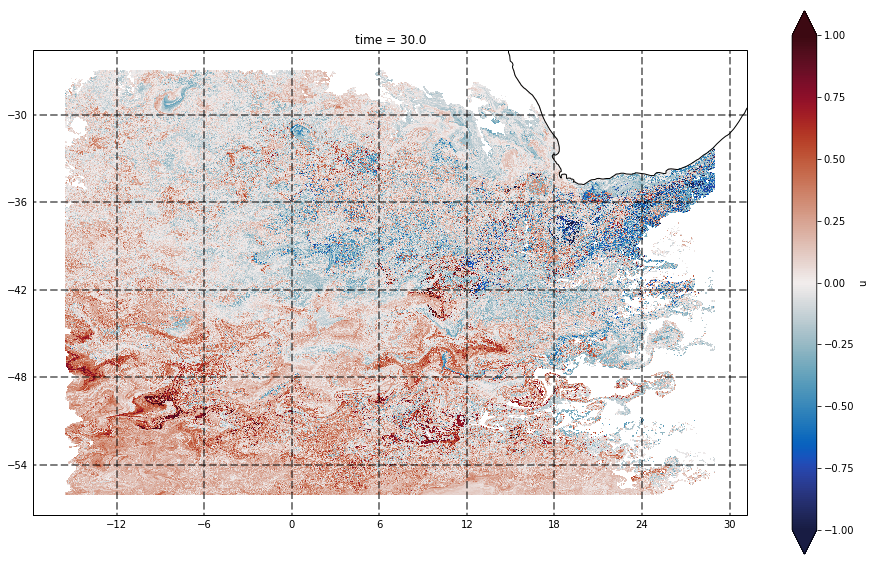

In [16]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=60).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

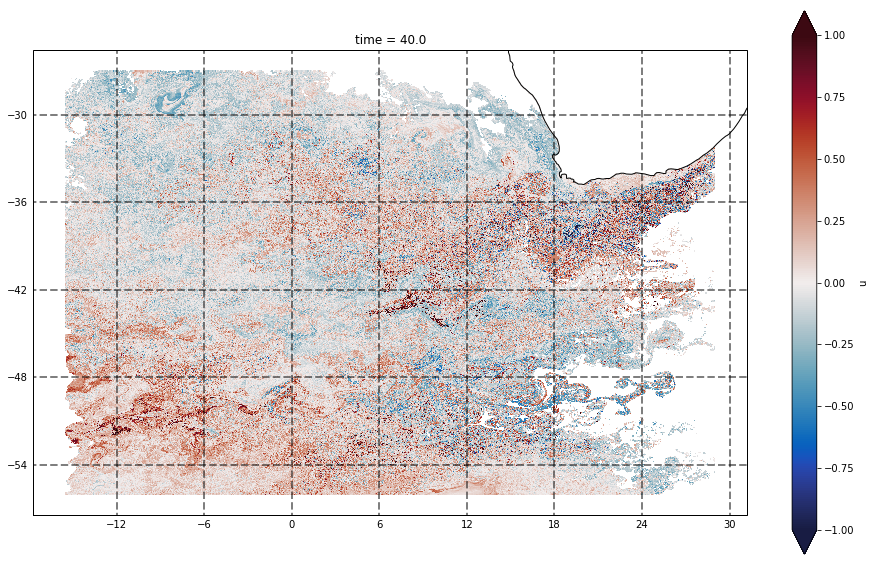

In [17]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=80).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

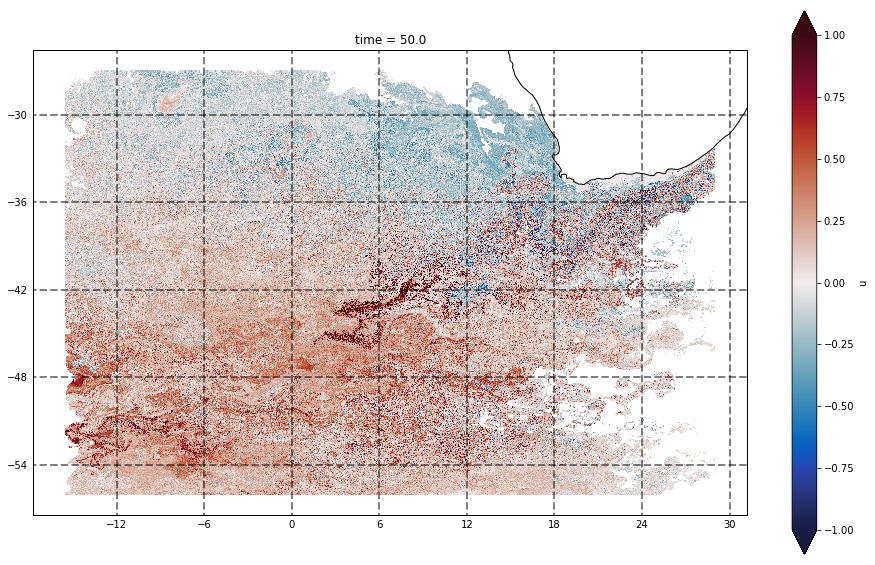

In [18]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=100).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

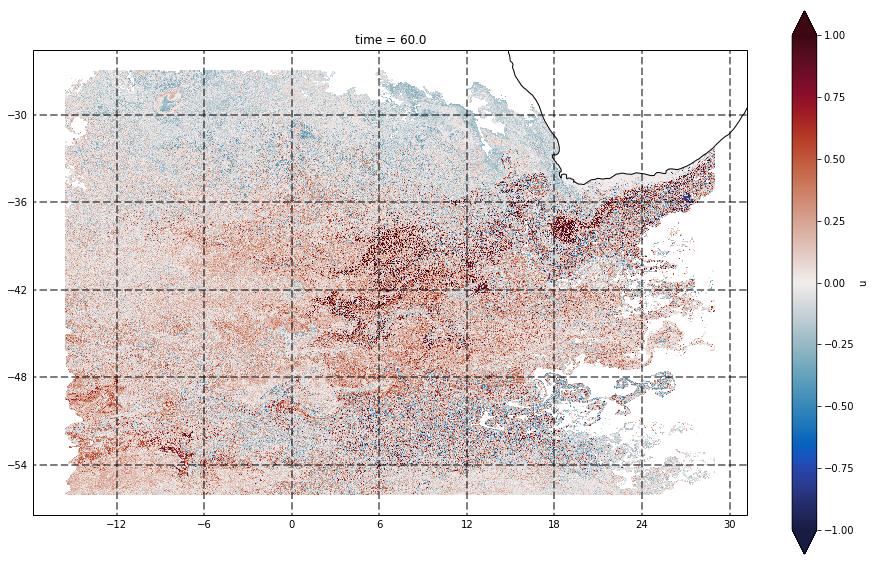

In [19]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_masked2['u'].isel(time=120).plot.pcolormesh(ax=ax, x='x0', y='y0', transform=ccrs.PlateCarree(), vmin=-1., vmax=1., cmap = cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(resolution='50m', color='k')

## Try to produce the whole figures it in a loop (failed so far)

In [14]:
from dask import compute, delayed

In [18]:
def plot_scalar(v, colorbar=False, title=None, vmin=None, vmax=None, savefig=None, 
                offline=False, coast_resolution='110m', figsize=(10,10), cmap=None):
    #
    if vmin is None:
        vmin = v.min()
    if vmax is None:
        vmax = v.max()
    #
    MPL_LOCK = threading.Lock()
    with MPL_LOCK:
        if offline:
            plt.switch_backend('agg')
        colmap = _get_cmap(v, cmap)
        #
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
        try:
            im = v.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                                   x='x0', y='y0', add_colorbar=colorbar, cmap=colmap)
            fig.colorbar(im)
            gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', 
                            alpha=0.5, linestyle='--')
            gl.xlabels_top = False
            if coast_resolution is not None:
                ax.coastlines(resolution=coast_resolution, color='k')
        except:
            pass
        #
        if title is not None:
            ax.set_title(title)
        #
        if savefig is not None:
            fig.savefig(savefig, dpi=150)
            plt.close(fig)
        #
        #if not offline:
        #    plt.show()
        return fig, ax

In [19]:
## Southen Africa ##

vmin, vmax = -.5, .5

#delete all figures beforehand
figdir = datawork+'figs/'
print('Figures directory: '+figdir)

def process(ds, i, overwrite=True):    
    
    # !! passing the variable ds['Eta'] does not work
    v = ds_masked1['v']
    
    #time = pd.to_datetime(str(eta['time'].values))
    time = v['time'].values/86400.
    figname = figdir+'mit_v_t%05d' %i+'.png'
    #
    if not os.path.isfile(figname) or overwrite:
        #
        title = 'v %.2f' %time
        plot_scalar(v, colorbar=False, title=title, savefig=figname, vmin=vmin, vmax=vmax, 
                    offline=True, coast_resolution='50m', figsize=(15,10))
        #
        m = float(v.mean().values)
    else:
        m = -1.
    return m

I = range(len(ds_masked1['time']))
print(I)
values = [delayed(process)(ds_masked1.isel(time=i), i) for i in I]


Figures directory: /home1/datawork/xyu/figs/
range(0, 132)


In [22]:
    v = ds_masked1['v']
print(v)

<xarray.DataArray 'v' (time: 132, y0: 2900, x0: 4450)>
dask.array<shape=(132, 2900, 4450), dtype=float32, chunksize=(1, 2900, 4450)>
Coordinates:
  * y0       (y0) float32 -55.995 -55.985 -55.975 -55.965 -55.955 -55.945 ...
  * x0       (x0) float32 -15.495 -15.485 -15.475 -15.465 -15.455 -15.445 ...
  * time     (time) int64 0 43200 86400 129600 172800 216000 259200 302400 ...


In [ ]:
%time results = compute(*values, get=client.get)

In [21]:
cluster.scheduler.close()

<Future finished result=None>